# Diabetes Prediction Using ML Predictive Models

In this task, we will do the EDA and data cleaning on the collected dataset from BRFSS. Then, we will use some good ML models for the prediction (Diabetes or not) task and compare their performance based on some matrices (i.e. Accuracy, Precision, AUC, f1 score, etc.)

Data Source: The raw dataset has been collected from the Behavioral Risk Factor Surveillance System. It is a health-related survey. Each year, this survey collects responses from over 400,000 Americans on chronic health issues, health-related risk behaviors, and the use of preventative services.

Major research areas:

- Do the survey questions from the BRFSS provide a good-quality prediction of whether an individual has diabetes or not?
- What risk factors are most predictive of diabetes risk?
- Can a subset of the risk factors (by feature sorting) be used to accurately predict whether an individual has diabetes or not?
- In this way, can we create a short form of questions from the BRFSS using features (from feature sorting or selection) to accurately predict if someone might have diabetes or is at high risk of diabetes?

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve,balanced_accuracy_score,confusion_matrix


In [10]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\ML Projects on Github\WiDS\Diabetes Prediction\diabetes_binary_health_indicators_BRFSS2015 - diabetes_binary_health_indicators_BRFSS2015.csv")

# Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

Diabetes_binary
0    86.066698
1    13.933302
Name: proportion, dtype: float64


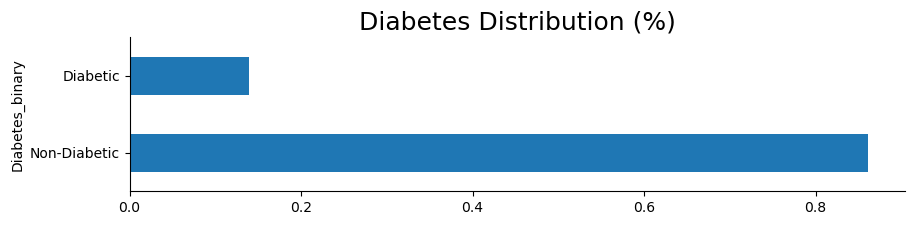

In [15]:
#First we will look for the distribution of Diabetes in the Data
print(df['Diabetes_binary'].value_counts(normalize=True) * 100)

df['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

Distribution of people (based on gender) with or without diabetes, this will help us in shaping our data and selecting the best features. 
**Note: 0: Male, 1: Female**

In [21]:
#Almost equal distribution of sex in **people with diabetes**
df[df['Diabetes_binary']==1.0].Sex.value_counts(normalize=True)*100

Sex
0    52.087931
1    47.912069
Name: proportion, dtype: float64

In [23]:
#Almost equal distribution of sex in **people with no diabetes**
df[df['Diabetes_binary']==0.0].Sex.value_counts(normalize=True)*100

Sex
0    56.593568
1    43.406432
Name: proportion, dtype: float64

### Some insights of Dataset's 'Education' column
Education

This variable is a answer to Education level question:

What is the highest grade or year of school you completed?

1 = Never attended school or only kindergarten

2 = Grades 1 through 8 (Elementary)

3 = Grades 9 through 11 (Some high school)

4 = Grade 12 or GED (High school graduate)

5 = College 1 year to 3 years (Some college or technical school)

6 = College 4 years or more (College graduate)

In [26]:
#Distribution of people based on their education lavel in **people with diabetes** catagory
d_edu =df[df['Diabetes_binary']==1.0].Education.value_counts(normalize=True)*100 #most are college educated
d_edu

Education
4    31.307644
6    29.423414
5    29.293272
3     6.495785
2     3.346913
1     0.132971
Name: proportion, dtype: float64

In [28]:
#Distribution of people based on their education lavel in **people with no diabetes** catagory
df[df['Diabetes_binary']==0.0].Education.value_counts(normalize=True)*100
# from this, people with diabetes are slightly less for college educated overall

Education
6    44.392994
5    27.277474
4    23.671989
3     3.289456
2     1.309920
1     0.058168
Name: proportion, dtype: float64

In [37]:
#Distribution of people based on their age in **people with diabetes** catorgy
age_dist = df[df['Diabetes_binary']==1.0].Age.value_counts(normalize=True)*100
age_dist

Age
10    18.553726
9     16.219657
11    14.544786
8     12.060771
12     9.627681
13     9.078821
7      8.736491
6      4.928422
5      2.973462
4      1.771063
3      0.888361
2      0.396084
1      0.220676
Name: proportion, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10964\185353118.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 90)


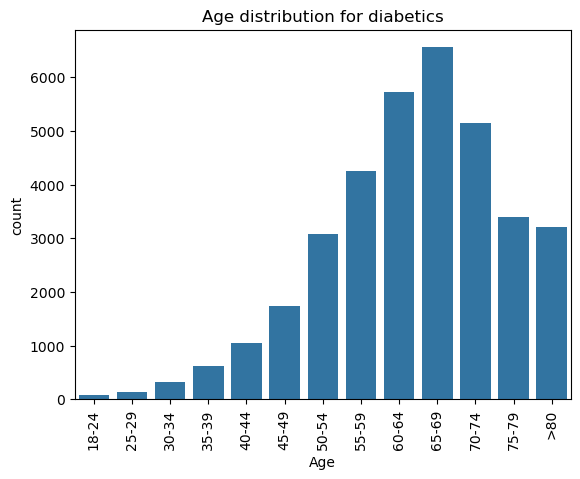

In [39]:
# People's age distribution for **people with diabetes** catagory
ax = sns.countplot(data=df[df['Diabetes_binary']==1.0], x='Age')
ax.set(title= 'Age distribution for diabetics')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 90)
plt.rcParams["figure.figsize"] = (15,6)

In [41]:
#People with age of 45 years or more are diabetic with percentage: 93%
age_dist.head(8).sum()

93.75035364680585

In [43]:
#Distribution of people's age in **people with no diabetes** catorgy
age_dist2 = df[df['Diabetes_binary']==0.0].Age.value_counts(normalize=True).to_frame() *100
age_dist2

,proportion
Age,
9,12.600420
8,12.168970
10,11.741644
7,10.637830
11,8.423791
6,8.279517
5,6.918757
13,6.482728
4,6.044409


In [49]:
#People with age of 6 years or more are non-diabetic with percentage: 83%
age_dist2[age_dist2>=6].sum()

proportion    83.298066
dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10964\3023607775.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 90)


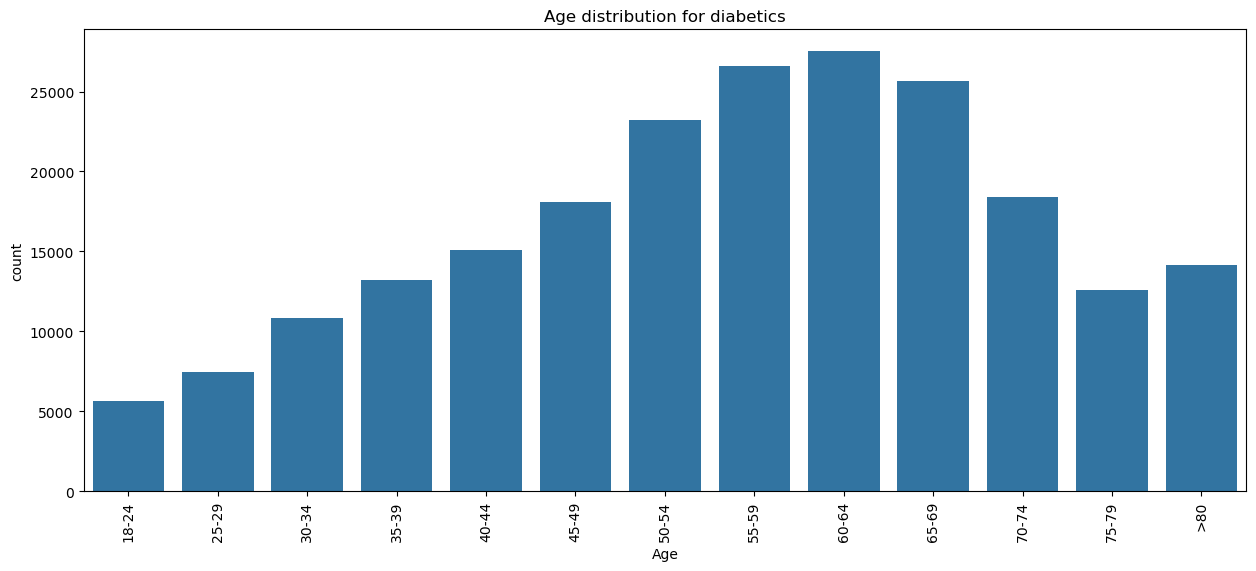

In [51]:
# People's age distribution for **people with non-diabetes** catagory
ax = sns.countplot(data=df[df['Diabetes_binary']==0.0], x='Age')
ax.set(title= 'Age distribution for diabetics')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 90)
plt.rcParams["figure.figsize"] = (15,5)

In [53]:
#Distribution of people based on their High BP lavel in **people with diabetes** catagory
df[df['Diabetes_binary']==1.0].HighBP.value_counts(normalize=True)*100

HighBP
1    75.267357
0    24.732643
Name: proportion, dtype: float64

In [55]:
#Distribution of people based on their High BP lavel in **people with no diabetes** catagory
df[df['Diabetes_binary']==0.0].HighBP.value_counts(normalize=True)*100

HighBP
0    62.33981
1    37.66019
Name: proportion, dtype: float64

Note: It is seen that probability of highbp in diabetic patients is very high(75%), and it is way lower in non-diabetic people(37%)

In [58]:
#Distribution of people based on their High Cholesterol lavel in **people with diabetes** catagory
df[df['Diabetes_binary']==1.0].HighChol.value_counts(normalize=True)*100

HighChol
1    67.011826
0    32.988174
Name: proportion, dtype: float64

In [60]:
#Distribution of people based on their education lavel in **people with no diabetes** catagory
df[df['Diabetes_binary']==0.0].HighChol.value_counts(normalize=True)*100

HighChol
0    61.570346
1    38.429654
Name: proportion, dtype: float64

Note: High cholesterol levels are common in diabetic patients (67%), and much more lower in non-diabetic patients (38%)

In [63]:
#Distribution of people based on their Heart issue or record (in the past) in **people with diabetes** catagory
df[df['Diabetes_binary']==1.0].HeartDiseaseorAttack.value_counts(normalize=True)*100

HeartDiseaseorAttack
0    77.711764
1    22.288236
Name: proportion, dtype: float64

In [65]:
#Distribution of people based on their Heart issue or record (in the past) in **people with no diabetes** catagory
df[df['Diabetes_binary']==0.0].HeartDiseaseorAttack.value_counts(normalize=True)*100

HeartDiseaseorAttack
0    92.664908
1     7.335092
Name: proportion, dtype: float64

Note: Patients with diabetes (22%) are 3x more likely to have suffered a heart attack or gotten a heart disease with no diabetes (7%).

In [68]:
#Distribution of people based on their Stroke issue or record (in the past) in **people with diabetes** catagory
df[df['Diabetes_binary']==1.0].Stroke.value_counts(normalize=True)*100

Stroke
0    90.754258
1     9.245742
Name: proportion, dtype: float64

In [70]:
#Distribution of people based on their Stroke issue or record (in the past) in **people with no diabetes** catagory
df[df['Diabetes_binary']==0.0].Stroke.value_counts(normalize=True)*100

Stroke
0    96.782911
1     3.217089
Name: proportion, dtype: float64

Note: Diabetic patients are almost 3x more likely to have been diagnosed with stroke (9%) than non-diabetic patients (3%), although incidence is low in both cases.

Some insight on **BMI** and its effect on Diabetes

According to WHO classification, a BMI less than 18.5, is considered Underweight, a BMI of 18.5-24.9 falls is Healthy, 25-29.9 falls on the Overweight Range. and a BMI of 30.0 or higher is considered obese. BMI is a major risk factor in Diabetes, people who are overweight are at an enhanced risk of especially developing type 2 Diabetes.

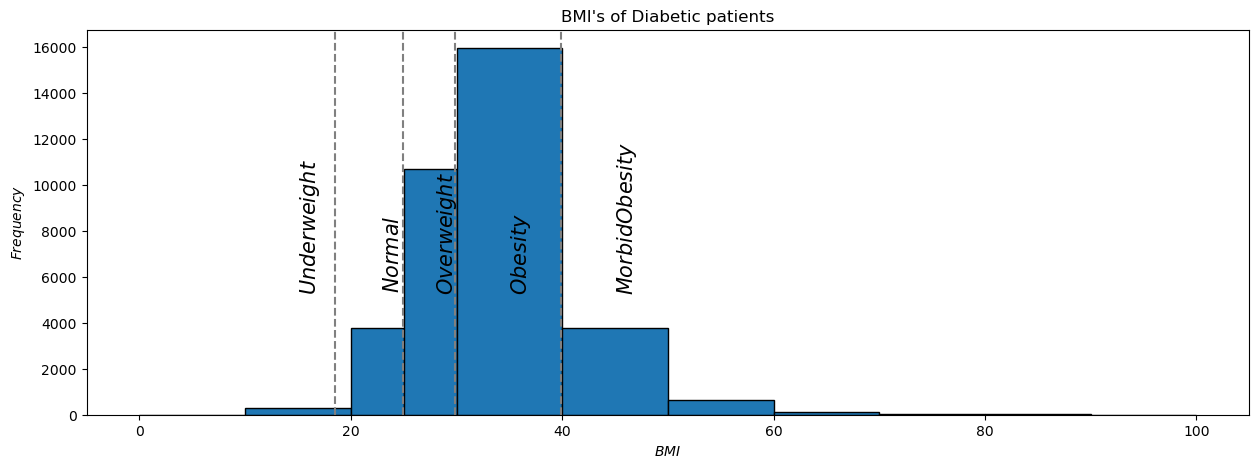

In [75]:
#BMI Distribution for Diabetic Patient
plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')
plt.axvline(39.9, color='gray', linestyle='--')

# add text
plt.text(15, 5500, '$Underweight$', rotation=90, size=15)
plt.text(23, 5500, '$Normal$', rotation=90, size=15)
plt.text(28, 5500, '$Overweight$', rotation=90, size=15)
plt.text(35, 5500, '$Obesity$', rotation=90, size=15)
plt.text(45, 5500, '$Morbid Obesity$', rotation=90, size=15)

plt.hist(df[df['Diabetes_binary']==1.0].BMI,edgecolor='black', bins=[0,10,20,25,30,40,50,60,70,80,90,100])
plt.xlabel('$BMI$')
plt.ylabel('$Frequency$')
plt.title("BMI's of Diabetic patients")
plt.rcParams["figure.figsize"] = (15,5)

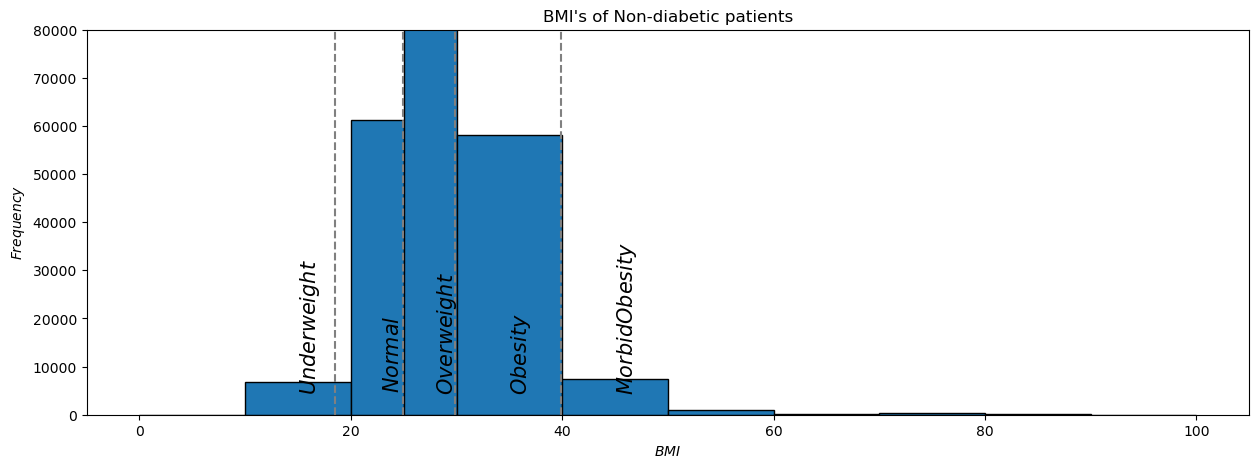

In [77]:
#BMI Distribution for Non-Diabetic Patient
plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')
plt.axvline(39.9, color='gray', linestyle='--')

# add text
plt.text(15, 5500, '$Underweight$', rotation=90, size=15)
plt.text(23, 5500, '$Normal$', rotation=90, size=15)
plt.text(28, 5500, '$Overweight$', rotation=90, size=15)
plt.text(35, 5500, '$Obesity$', rotation=90, size=15)
plt.text(45, 5500, '$Morbid Obesity$', rotation=90, size=15)

plt.hist(df[df['Diabetes_binary']==0.0].BMI,edgecolor='black', bins=[0,10,20,25,30,40,50,60,70,80,90,100])
plt.xlabel('$BMI$')
plt.ylabel('$Frequency$')
plt.ylim([0, 80000])
plt.title("BMI's of Non-diabetic patients")
plt.rcParams["figure.figsize"] = (15,10)

### Ananysis on some more features (from the Dataset) for Diabetes Prediction Modelling task

In [83]:
# Hasn't fallen sick in the last 30 days and feels excellent or very good
df['PerfectHlth'] = (df['PhysHlth']==0.0) & (df['GenHlth']<3.0)
df['PerfectHlth'] = df['PerfectHlth'].astype(int)

In [85]:
# No single issue with heart disease or BP

df['NoHrtIssue'] = (df['HighBP']==0.0) & (df['HighChol']==0.0) & (df['HeartDiseaseorAttack']==0.0)
df['NoHrtIssue'] = df['NoHrtIssue'].astype(int)

In [87]:
# Diabetics would most likely feel unwell and in a slightly poorer state of health

df['hlthNotGood'] = df['GenHlth'] > 3
df['HlthAboveGood'] = df['GenHlth'] < 3
df['hlthNotGood'] = df['hlthNotGood'].astype(int)
df['HlthAboveGood'] = df['HlthAboveGood'].astype(int)

In [89]:
#unwell & difficulty walking because of low or excess sugar(check to confirm)
df['hlthNotGood&DiffWalk'] = (df['GenHlth'] > 3.0) & (df['DiffWalk']==1.0)
df['hlthNotGood&DiffWalk'] = df['hlthNotGood&DiffWalk'].astype(int)

In [91]:
# Type 2 diabetes being age-related: people with high blood pressure and heart disease/illness(more prevalent with aging)

df['hbp&HA'] = (df['HeartDiseaseorAttack'] == 1.0) & (df['HighBP'] == 1.0)
df['hbp&HA'] = df['hbp&HA'].astype(int)
df['hbp&HA'].value_counts()

hbp&HA
0    235752
1     17928
Name: count, dtype: int64

In [93]:
df['older&poor'] = (df['Age'] > 5.0) & (df['Income'] < 5)
df['older&poor'] = df['older&poor'].astype(int)
df['older&poor'].value_counts()

older&poor
0    206599
1     47081
Name: count, dtype: int64

### Plotting the correlation
Correlation of each feature to Diabetes Binary outcome.
Note: -ve correlation to diabetes implies +ve correlation to being non-diabetic

In [97]:
df_corr = df.corr(numeric_only=True)
df_corr['Diabetes_binary'].sort_values(ascending=False)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
hlthNotGood             0.249898
DiffWalk                0.218344
BMI                     0.216843
hlthNotGood&DiffWalk    0.211009
HighChol                0.200276
hbp&HA                  0.185759
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
older&poor              0.166253
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
PerfectHlth            -0.206849
NoHrtIssue             -0.234274
HlthAboveGood          -0.255507
Name: Diabetes_binary, dtype: float64

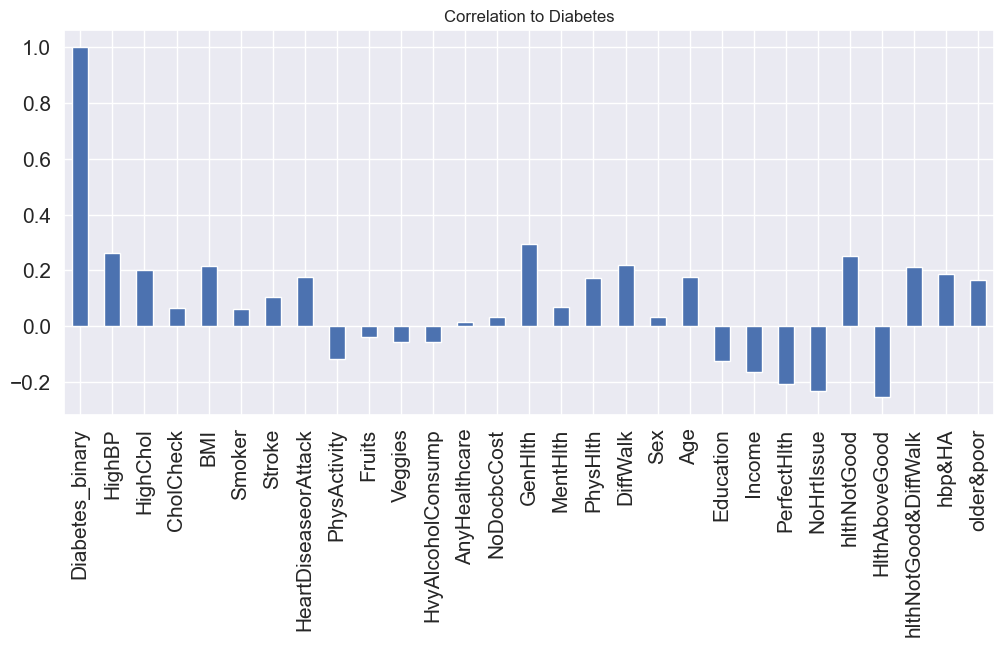

In [99]:
sns.set(color_codes=True)
df.corrwith(df.Diabetes_binary).plot.bar( figsize = (12, 5), title = "Correlation to Diabetes", fontsize = 15, rot = 90, grid = True);

### Data Preparation


In [102]:
#From the above analysis, we have identified some irrelevant features (for this predictive task) and now we will drop those irrelevant features
df2 = df.drop(['Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'Income',
              'Education', 'CholCheck'],axis=1)

In [104]:
df3 = df2.copy()

In [106]:
df3.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'PerfectHlth',
       'NoHrtIssue', 'hlthNotGood', 'HlthAboveGood', 'hlthNotGood&DiffWalk',
       'hbp&HA', 'older&poor'],
      dtype='object')

### Encoding 
Now we will use Encoder on the categorical features to produce their vector embeddings

In [110]:
cat_feats=['Diabetes_binary', 'HighBP', 'HighChol',  'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth',  'DiffWalk', 'Sex', 'PerfectHlth', 'NoHrtIssue', 'hlthNotGood',
             'HlthAboveGood', 'hlthNotGood&DiffWalk', 'hbp&HA', 'older&poor']
lb = LabelEncoder()
for col in cat_feats:
    df3[col]=lb.fit_transform( df3[col])


In [112]:
df3.duplicated().sum()

85170

In [114]:
df3[df3.duplicated()]["Diabetes_binary"].value_counts()

Diabetes_binary
0    82175
1     2995
Name: count, dtype: int64

In [116]:
df3.drop_duplicates()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,...,DiffWalk,Sex,Age,PerfectHlth,NoHrtIssue,hlthNotGood,HlthAboveGood,hlthNotGood&DiffWalk,hbp&HA,older&poor
0,0,1,1,40,1,0,0,0,0,4,...,1,0,9,0,0,1,0,1,0,1
1,0,0,0,25,1,0,0,1,0,2,...,0,0,7,0,1,0,0,0,0,1
2,0,1,1,28,0,0,0,0,0,4,...,1,0,9,0,0,1,0,1,0,0
3,0,1,0,27,0,0,0,1,0,1,...,0,0,11,1,0,0,1,0,0,0
4,0,1,1,24,0,0,0,1,0,1,...,0,0,11,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0,1,0,42,0,0,0,1,0,2,...,0,1,3,0,0,0,0,0,0,0
253675,0,1,1,45,0,0,0,0,0,2,...,0,1,5,0,0,0,0,0,0,0
253676,1,1,1,18,0,0,0,0,0,3,...,1,0,11,0,0,1,0,1,0,1
253678,0,1,0,23,0,0,0,0,0,2,...,0,1,7,0,0,0,0,0,0,1


In [118]:
df3['Diabetes_binary'].value_counts(normalize=True).to_frame()*100

,proportion
Diabetes_binary,
0,86.066698
1,13.933302


In [120]:
# Preparing and splitting training dataset into features (X) and label (y)
X = df3.drop('Diabetes_binary', axis =1)
y = df3['Diabetes_binary']

### Managing the Imbalance
The training dataset has more non-diabetic samples than diabetic samples.
We will use "Random Oversampler" to balance the target label

In [124]:
OverS=RandomOverSampler(random_state=42, sampling_strategy='not majority')
X_over,y_over=OverS.fit_resample(X,y)

### Splitting Dataset into Training and Testing Datasets

In [128]:
X_over_train,X_over_test,y_over_train,y_over_test=train_test_split(X_over,y_over,test_size=0.2,random_state=42)

In [132]:
# Total feature datasets (incl. Training and Test data)
X_over

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,...,DiffWalk,Sex,Age,PerfectHlth,NoHrtIssue,hlthNotGood,HlthAboveGood,hlthNotGood&DiffWalk,hbp&HA,older&poor
0,1,1,40,1,0,0,0,0,4,18,...,1,0,9,0,0,1,0,1,0,1
1,0,0,25,1,0,0,1,0,2,0,...,0,0,7,0,1,0,0,0,0,1
2,1,1,28,0,0,0,0,0,4,30,...,1,0,9,0,0,1,0,1,0,0
3,1,0,27,0,0,0,1,0,1,0,...,0,0,11,1,0,0,1,0,0,0
4,1,1,24,0,0,0,1,0,1,3,...,0,0,11,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436663,1,1,28,0,0,1,1,0,4,2,...,1,0,8,0,0,1,0,1,1,1
436664,1,1,30,1,1,1,0,0,3,30,...,1,0,12,0,0,1,0,1,1,1
436665,1,1,36,0,1,1,0,0,1,0,...,1,0,10,0,0,0,1,0,1,0
436666,1,1,30,0,0,0,0,0,3,15,...,1,1,7,0,0,1,0,1,0,0


### Machine Learing Models Development

In [135]:
# A function that outputs ML model's performance metrics (i.e Accuracy, Precision, F1 score, Recall, Balanced Accuracy, Area Under Curve (AUC) scores
def train_evaluate_model(predictions,y_test):

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions,average='micro')


    precision = precision_score(y_test, predictions,average='micro')
    recall = recall_score(y_test, predictions,average='micro')
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions,multi_class='ovr')

    # a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

### A. Decision Tree Classifier Model

In [138]:
dtree = DecisionTreeClassifier(random_state=42)
dtree = dtree.fit(X_over_train, y_over_train)
DecisionTree_over_predicted=dtree.predict(X_over_test)

In [140]:
results = train_evaluate_model(DecisionTree_over_predicted,y_over_test)
results.index = ['Decision tree - over sampling']
results.style.background_gradient(cmap = sns.color_palette("Greens", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Decision tree - over sampling,0.889894,0.889894,0.889894,0.889894,0.890036,0.890036


In [142]:
print('Decision Tree Model Evaluation Matrices:')
print(classification_report(y_over_test, DecisionTree_over_predicted,
                           target_names=['non-diabetic','diabetic']))

Decision Tree Model Evaluation Matrices:
              precision    recall  f1-score   support

non-diabetic       0.94      0.83      0.88     43773
    diabetic       0.85      0.95      0.90     43561

    accuracy                           0.89     87334
   macro avg       0.90      0.89      0.89     87334
weighted avg       0.90      0.89      0.89     87334



Note: Significance of 'Recall' to measure Machine Learning Models' performance in Healthcare domain:
It is very important in medical domain (e.g., identifying cancer), where you really want to minimize the chance of missing positive cases (predicting false negatives). These are typically cases where missing a positive case has a much bigger cost than wrongly classifying something as positive.

The Recall score of this model is 0.95 for Diabetic catagory i.e. 95% of all cases will be correctly identified. The precision is not that high and it is 86%, but is less problematic for the community (and the patient) than a false negative.

### B. Random Forest (with Parameter Tuning) Classifier Model

In [146]:
# Using random forest, first lets try to figure out the best estimator
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20]
}


RF_grid_search_ = GridSearchCV(rfc, param_grid=param_grid, cv=3, n_jobs=-1,verbose=3)
RF_grid_search_.fit(X_over_train,y_over_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=3)

In [147]:
RF_grid_search_.best_params_

{'max_depth': 20, 'n_estimators': 300}

In [150]:
RF_grid_search_.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=300)

In [152]:
RF_over = RandomForestClassifier(max_depth=20, n_estimators=300)
RF_over.fit(X_over_train, y_over_train)
RF_over_predctions=RF_over.predict(X_over_test)
RAndom_forst_over_score=train_evaluate_model(RF_over_predctions,y_over_test)
RAndom_forst_over_score.index = ['Random Forest - over sampling']
RAndom_forst_over_score.style.background_gradient(cmap = sns.color_palette("Greens", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Random Forest - over sampling,0.873955,0.873955,0.873955,0.873955,0.874094,0.874094


In [155]:
print(classification_report(y_over_test, RF_over_predctions,
                           target_names=['non-diabetic','diabetic']))

              precision    recall  f1-score   support

non-diabetic       0.92      0.82      0.87     43773
    diabetic       0.84      0.93      0.88     43561

    accuracy                           0.87     87334
   macro avg       0.88      0.87      0.87     87334
weighted avg       0.88      0.87      0.87     87334



In [157]:
# After Checking its performance on the training set, now its performance will be evaluated on the test set
predr = RF_over.predict(X_over_train)
print(classification_report(y_over_train, predr,
                           target_names=['non-diabetic','diabetic']))

              precision    recall  f1-score   support

non-diabetic       0.94      0.89      0.91    174561
    diabetic       0.89      0.94      0.92    174773

    accuracy                           0.91    349334
   macro avg       0.92      0.91      0.91    349334
weighted avg       0.92      0.91      0.91    349334



In [162]:
# Performance of Random Classifier without performing parameter tuning
rfc = RandomForestClassifier()
rfc.fit(X_over_train, y_over_train)
pred_test = rfc.predict(X_over_test)
print(classification_report(y_over_test, pred_test, target_names=['non-diabetic','diabetic']))

              precision    recall  f1-score   support

non-diabetic       0.95      0.85      0.90     43773
    diabetic       0.86      0.95      0.91     43561

    accuracy                           0.90     87334
   macro avg       0.91      0.90      0.90     87334
weighted avg       0.91      0.90      0.90     87334



Note : Random Forest (without any hyperparameters tuning) performed well with acceptable accuracy and recall values.
It performs really well (this is predicting new data(X_over_test), not the train data. It is always important to check how your model will perform on a new set of data).

### Important Features
Here is a list of important features for this Diabetes prediction modelling

In [167]:
for name, score in zip(X_over, rfc.feature_importances_):
    print(name, score)

HighBP 0.06693796959421806
HighChol 0.027309572561836457
BMI 0.23494938009633262
Smoker 0.02688306076537604
Stroke 0.01083082207442971
HeartDiseaseorAttack 0.007276124348339245
PhysActivity 0.02346093782987375
HvyAlcoholConsump 0.01016167889184949
GenHlth 0.0731566424470545
MentHlth 0.07862697987895975
PhysHlth 0.09424177336885572
DiffWalk 0.018658946952823323
Sex 0.024303978695011844
Age 0.155552590084711
PerfectHlth 0.01751106849726683
NoHrtIssue 0.04344364548745913
hlthNotGood 0.01676335313543483
HlthAboveGood 0.04009473152631795
hlthNotGood&DiffWalk 0.004862651608077916
hbp&HA 0.004724140756281265
older&poor 0.020249951399490613


In [169]:
Rforst_np_over_score=train_evaluate_model(pred_test,y_over_test)
Rforst_np_over_score.index = ["Random Forest(no_hyperparam) - over sampling"]
Rforst_np_over_score.style.background_gradient(cmap = sns.color_palette("Greens", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Random Forest(no_hyperparam) - over sampling,0.900726,0.900726,0.900726,0.900726,0.900853,0.900853


### C. Extreme Gradient Boosting Classifier Model

In [172]:
from xgboost import XGBClassifier
XGB_over=XGBClassifier(learning_rate=0.1)
XGB_over.fit(X_over_train,y_over_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [174]:
XGB_over_predctions=XGB_over.predict(X_over_test)
XGB_over_score=train_evaluate_model(XGB_over_predctions,y_over_test)
XGB_over_score.index=["XGB -over sampling"]
XGB_over_score.style.background_gradient(cmap = sns.color_palette("Greens", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
XGB -over sampling,0.759200,0.759200,0.759200,0.759200,0.759316,0.759316


In [176]:
#Listing all three models' performance scores
all_predictions = pd.concat([results, XGB_over_score, Rforst_np_over_score,
                    RAndom_forst_over_score],axis=0)

In [178]:
all_predictions.drop_duplicates().style.background_gradient(cmap = sns.color_palette("Greens", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Decision tree - over sampling,0.889894,0.889894,0.889894,0.889894,0.890036,0.890036
XGB -over sampling,0.759200,0.759200,0.759200,0.759200,0.759316,0.759316
Random Forest(no_hyperparam) - over sampling,0.900726,0.900726,0.900726,0.900726,0.900853,0.900853
Random Forest - over sampling,0.873955,0.873955,0.873955,0.873955,0.874094,0.874094


**Conclusion**
The best performing model is the Random Forest Model with random overrsampling.
Our best performing model has achieved an accuracy of 0.90 with recall of 0.90.
The features that show high correlation with the target (Diabetes or not) are: HighBP, HighChol, BMI, HlthAboveGood,hlthNotGood&DiffWalk, hbp&HA, older&poor, HeartDiseaseorAttack, PhysActivity,enHlth, PhysHlth, DiffWalk, and Age.

### Confusion Matrix

1. Confusion Matrix for Random Forest (no hyperparameter) Model

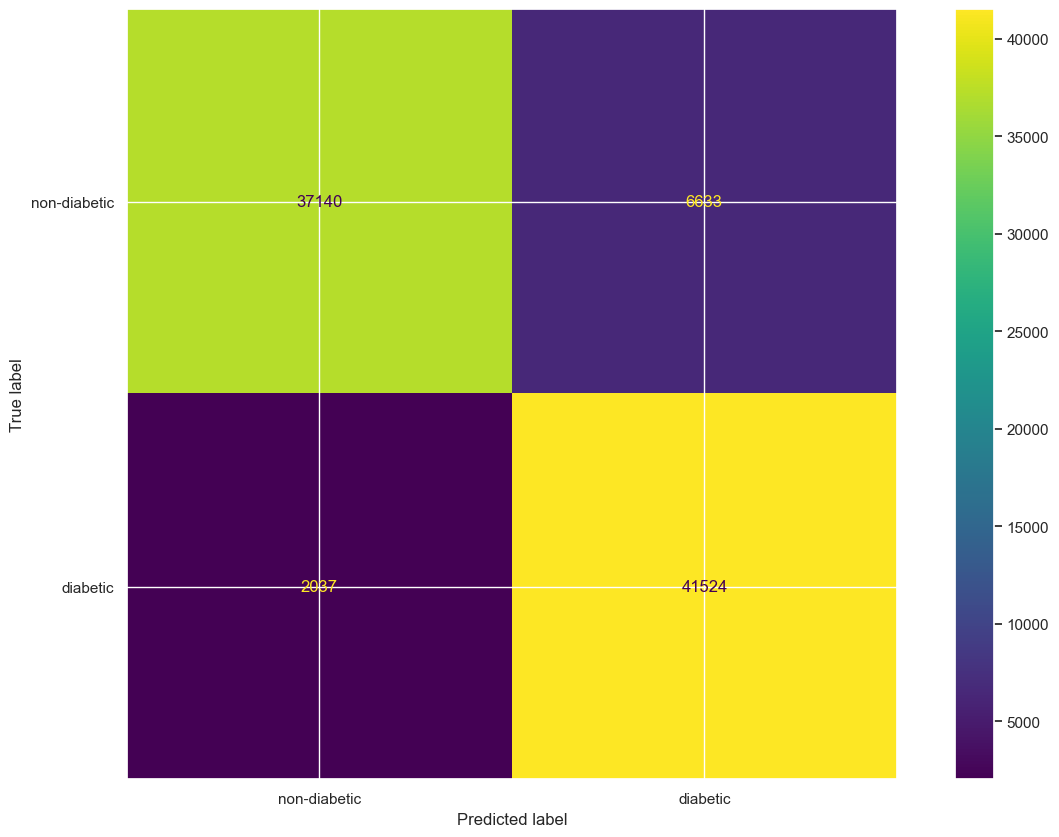

In [184]:
cm = confusion_matrix(y_over_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non-diabetic","diabetic"])
disp.plot()
plt.show()

2. Confusion Matrix for Decision Tree Model

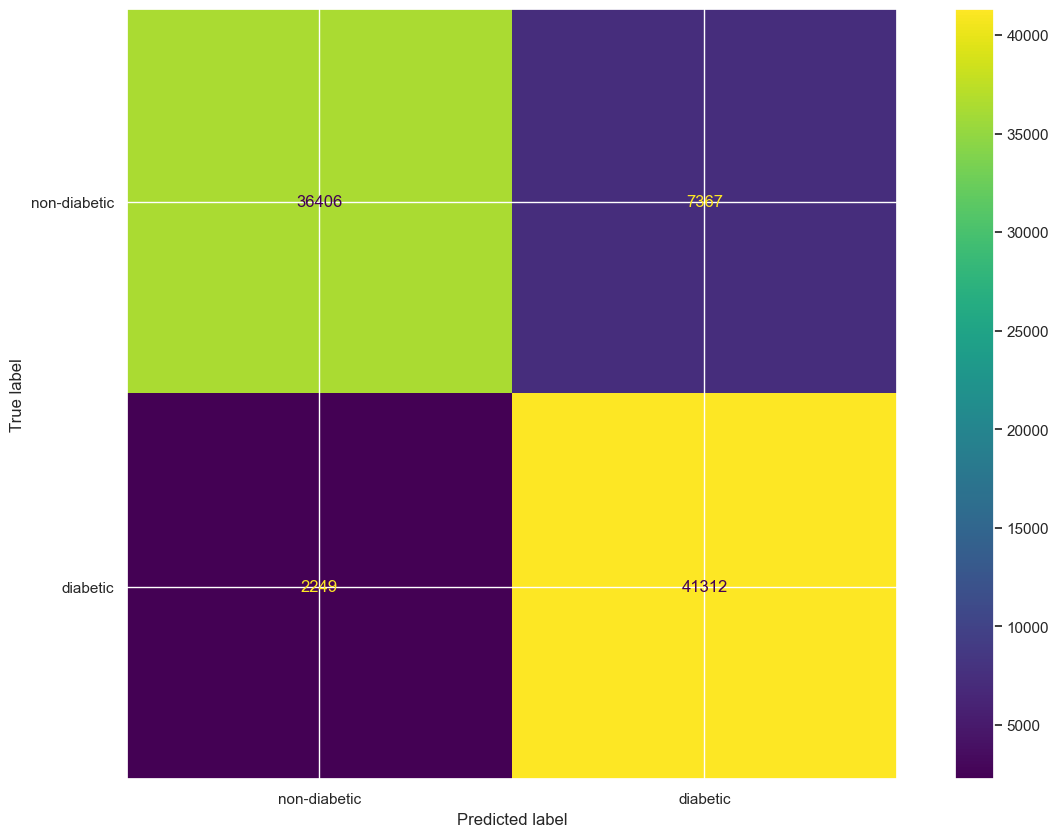

In [188]:
cm = confusion_matrix(y_over_test, DecisionTree_over_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non-diabetic","diabetic"])
disp.plot()
plt.show()